In [1]:
import sys
print(sys.executable)

/gpfs/share/apps/anaconda3/gpu/new/envs/contrastivelearning/bin/python3.9


In [20]:
import os
import numpy as np
# import nibabel as nib
import matplotlib.pyplot as plt
from scipy.io import loadmat
# from nilearn.plotting import plot_anat, show

In [8]:
# Function to load MRI images
def load_mri_images(subject_number):
    base_dir = '/gpfs/scratch/pa2297/Dataset/BraTS2021_Training_Data'
    folder_name = f"BraTS2021_{subject_number:05d}"
    images = {}
    
    for img_type in ['flair', 't1', 't1ce', 't2']:
        file_path = os.path.join(base_dir, folder_name, f"{folder_name}_{img_type}.nii.gz")
        if os.path.exists(file_path):
            images[img_type] = nib.load(file_path)
        else:
            print(f"File not found: {file_path}")
    
    return images

In [11]:
def load_constraint_map(subject_number):
    base_dir = '/gpfs/scratch/pa2297/Constraint_Maps'
    folder_name = f"BraTS2021_{subject_number:05d}"
    mat_file_path = os.path.join(base_dir, folder_name, 'Constraint_map_20.mat')
    
    if os.path.exists(mat_file_path):
        data = loadmat(mat_file_path)
        print(f"Successfully loaded {mat_file_path}")
        return data
    else:
        print(f"File not found: {mat_file_path}")
        return None

In [15]:
subject_number = 8  # Replace this with the actual subject number you want to access
data = load_constraint_map(subject_number)
if data is not None:
    pass

Successfully loaded /gpfs/scratch/pa2297/Constraint_Maps/BraTS2021_00008/Constraint_map_20.mat


In [16]:
def show_keys(data):
    if data is not None:
        print("Keys in the loaded .mat file:")
        for key in data.keys():
            print(key)
    else:
        print("No data loaded to show keys.")

show_keys(data)

Keys in the loaded .mat file:
__header__
__version__
__globals__
param


In [22]:
def print_param_shape(data):
    if data is not None and "param" in data:
        param_data = data["param"]
        print(f"The shape of 'param' is: {param_data.shape}")
    else:
        print("'param' key not found in the loaded data.")
        
print_param_shape(data)
x = data['param']

The shape of 'param' is: (160, 160, 155)


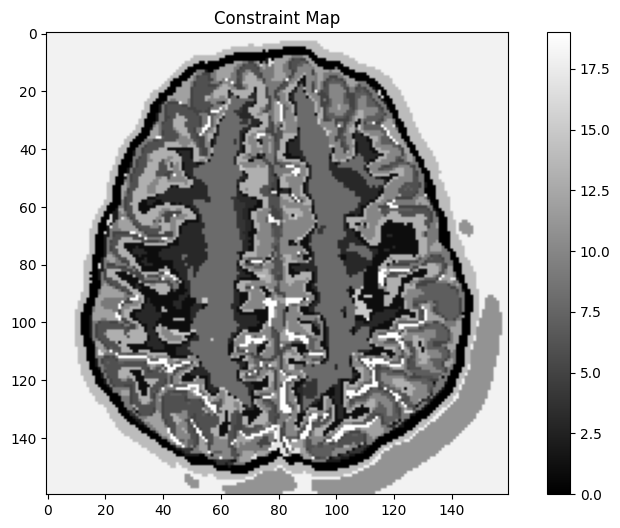

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.imshow(np.abs(x[:,:,110]), cmap='gray') 
plt.colorbar() 
plt.title('Constraint Map')  
plt.show() 
